# Robust Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model

## Outliers

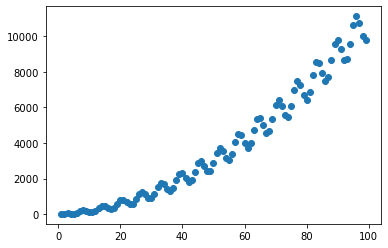

In [2]:
# Let's use the same data from earlier this morning and add some error
n = 100
x = np.arange(1,n).reshape(-1,1)
y = np.array([(i**2)+(10*i)*(np.sin(i)+1) for i in x])
plt.scatter(x,y)

In [3]:
# Add some problem data points
noutlier = 20

By making the number of outliers a variable it is easy to adjust and rerun to see how the number of outliers changes the ability to fit a model

In [4]:
x = np.vstack([x,np.random.uniform(0,100,noutlier).reshape(noutlier,1)])
y = np.vstack([y,np.random.uniform(0, 8000,noutlier).reshape(noutlier,1)])

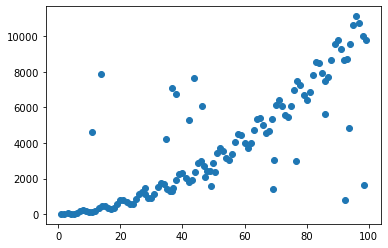

In [5]:
plt.scatter(x,y)

In [6]:
def make_plots(title=None):
    """
    Plot residual and model fit plots. The assumption of outside
    function variable names that this function is based on is bad practice.
    """
    if(x.shape[1] > 1):
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x_test[:,1],pred_test), key=sort_axis)
        xplt, yplt = zip(*sorted_zip)
    else:
        xplt = x_test
        yplt = pred_test
        
    plt.subplot(121)
    plt.scatter(xplt,y_test,label='Test data')
    plt.plot(xplt,yplt,label=title,color='red',linewidth=2)
    plt.legend()
    plt.subplot(122)
    plt.scatter(xplt,res_test)
    plt.title("Residuals (test data)")
    plt.show()

    if(x.shape[1] > 1):
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x[:,1],pred), key=sort_axis)
        xplt, yplt = zip(*sorted_zip)
    else:
        xplt = x
        yplt = pred

    plt.subplot(121)
    plt.plot(xplt,yplt,label=title,color='red',linewidth=2)
    plt.scatter(xplt,y,label='Data')
    plt.legend()
    plt.subplot(122)
    plt.scatter(xplt,res)
    plt.title("Residuals")

## Regression Model

Be sure to apply the transformation that we found earlier and separate out test and training sets

In [7]:
y = np.sqrt(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

### General regression model

In [8]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
print("R^2: ",model.score(x_test, y_test))
print("Slope: ", model.coef_)
print("Intercept: ", model.intercept_)
pred_test = model.predict(x_test)
res_test = pred_test - y_test
pred = model.predict(x)
res = pred - y

R^2:  0.7243269361669492
Slope:  [[0.84227894]]
Intercept:  [13.06406053]


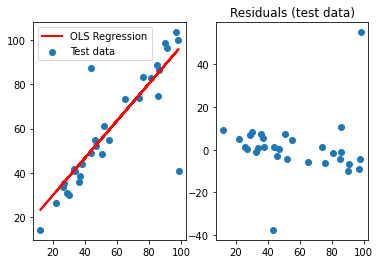

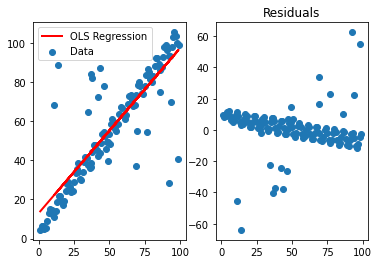

In [9]:
make_plots('OLS Regression')

## RANSAC

In [10]:
ransac = linear_model.RANSACRegressor()
ransac.fit(x_train, y_train)
print("R^2: ",ransac.score(x_test, y_test))
pred_test = ransac.predict(x_test)
res_test = pred_test - y_test
pred = ransac.predict(x)
res = pred - y

R^2:  0.7023116233551259


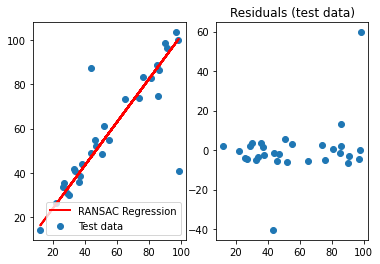

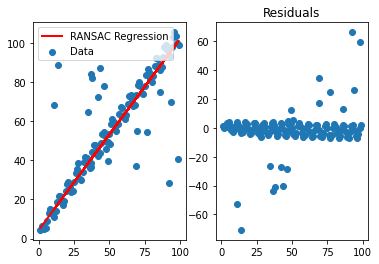

In [11]:
make_plots('RANSAC Regression')

## Theil-Sen

In [12]:
theil_sen = linear_model.TheilSenRegressor(random_state=3)
theil_sen.fit(x_train, y_train.ravel())
print("R^2: ",theil_sen.score(x_test, y_test))
pred_test = theil_sen.predict(x_test)
res_test = pred_test - y_test.ravel()
pred = theil_sen.predict(x)
res = pred - y.ravel()

R^2:  0.6977901521433716


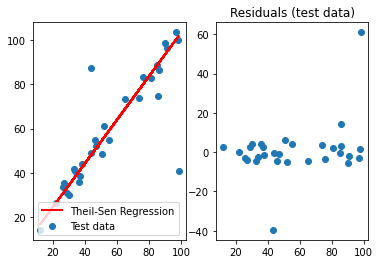

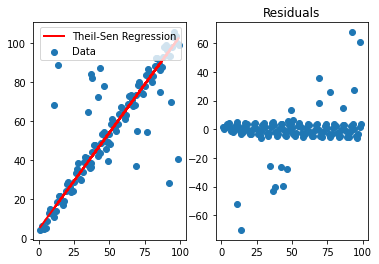

In [13]:
make_plots('Theil-Sen Regression')

## Huber 

In [14]:
huber = linear_model.HuberRegressor()
huber.fit(x_train, y_train.ravel())
print("R^2: ",huber.score(x_test, y_test))
pred_test = huber.predict(x_test)
res_test = pred_test - y_test.ravel()
pred = huber.predict(x)
res = pred - y.ravel()

R^2:  0.69547155559405


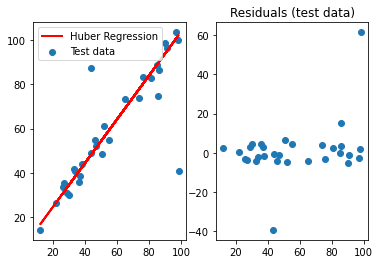

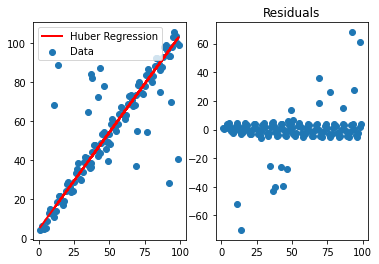

In [15]:
make_plots('Huber Regression')

### Comparison

In [16]:
print("R^2 OLS: ",model.score(x_test, y_test))
print("R^2 RANSAC: ",ransac.score(x_test, y_test))
print("R^2 Theil-Sen: ",theil_sen.score(x_test, y_test))
print("R^2 Huber: ",huber.score(x_test, y_test))

R^2 OLS:  0.7243269361669492
R^2 RANSAC:  0.7023116233551259
R^2 Theil-Sen:  0.6977901521433716
R^2 Huber:  0.69547155559405


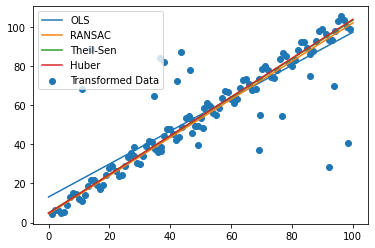

In [17]:
plt.scatter(x,y,label='Transformed Data')
xseq = np.linspace(0,100,num=100).reshape(-1, 1)
plt.plot(xseq,model.predict(xseq),label='OLS')
plt.plot(xseq,ransac.predict(xseq),label='RANSAC')
plt.plot(xseq,theil_sen.predict(xseq),label='Theil-Sen')
plt.plot(xseq,huber.predict(xseq),label='Huber')
plt.legend()

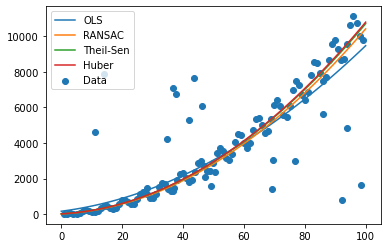

In [18]:
plt.scatter(x,y**2,label='Data')
xseq = np.linspace(0,100,num=100).reshape(-1, 1)
plt.plot(xseq,model.predict(xseq)**2,label='OLS')
plt.plot(xseq,ransac.predict(xseq)**2,label='RANSAC')
plt.plot(xseq,theil_sen.predict(xseq)**2,label='Theil-Sen')
plt.plot(xseq,huber.predict(xseq)**2,label='Huber')
plt.legend()